In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ecommerce_sales_analysis.csv')

1. Первичный анализ данных (EDA)

На этом этапе исследуем структуру датасета:
- количество строк и столбцов
- типы данных и наличие пропусков
- проверка выбросов и распределений ключевых признаков

In [6]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [10]:
df.shape

(1000, 18)

In [12]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [14]:
df.isna().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

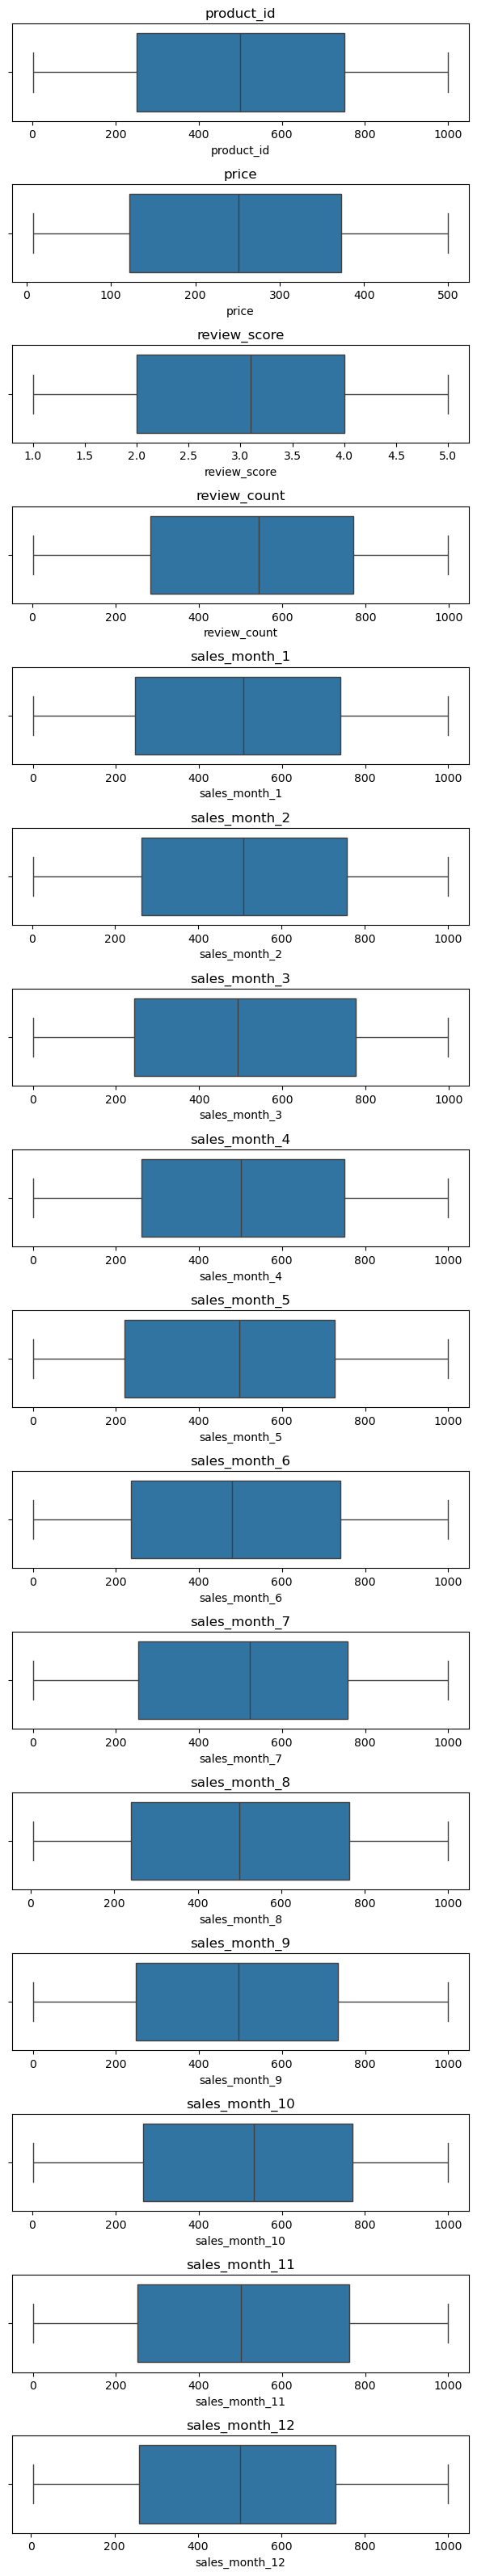

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(6, len(numeric_cols)*2))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

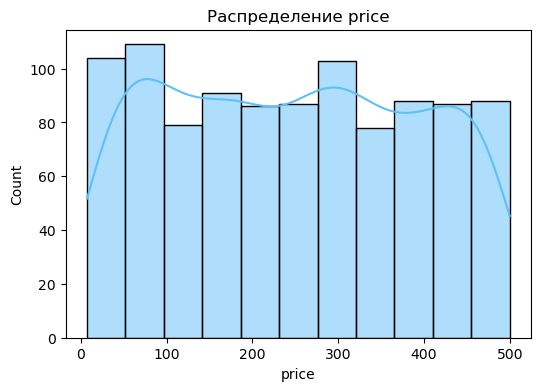

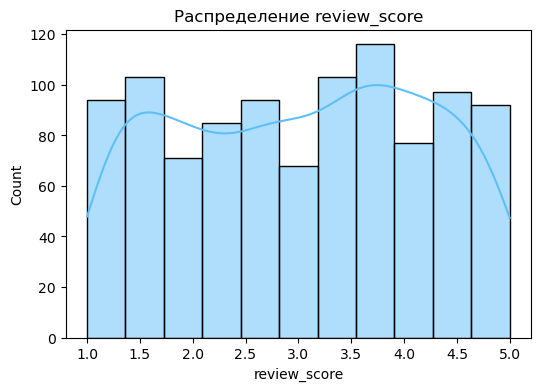

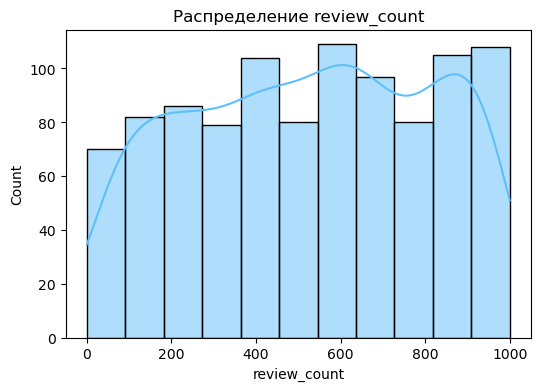

In [22]:
numeric_cols = ['price', 'review_score', 'review_count']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color = '#5FBFF9')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.show()

Для удобства, переименуем колонки c месячными продажами в более читаемый формат.

In [27]:
months_map = {
    'sales_month_1': 'sales_jan',
    'sales_month_2': 'sales_feb',
    'sales_month_3': 'sales_mar',
    'sales_month_4': 'sales_apr',
    'sales_month_5': 'sales_may',
    'sales_month_6': 'sales_jun',
    'sales_month_7': 'sales_jul',
    'sales_month_8': 'sales_aug',
    'sales_month_9': 'sales_sep',
    'sales_month_10': 'sales_oct',
    'sales_month_11': 'sales_nov',
    'sales_month_12': 'sales_dec'
}

df.rename(columns = months_map, inplace=True)

В датасете 1000 товаров и 18 столбцов.
Данные выглядят чисто: пропуски и дубликаты отсутствуют, типы колонок заданы корректно.
Также не наблюдается выбросов по числовым признакам, распределение ключевых метрик достаточно равномерное.

В целом, структура данных понятна и готова к дальнейшему анализу.

2. Определить наиболее эффективные категории продуктов

Создадим новые столбцы с годовыми продажами и общей выручкой по каждому продукту.

In [32]:
df['total_sales'] = df.filter(like = 'sales_').sum(axis=1)

In [34]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_jan,sales_feb,sales_mar,sales_apr,sales_may,sales_jun,sales_jul,sales_aug,sales_sep,sales_oct,sales_nov,sales_dec,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [36]:
df['revenue'] = df['price'] * df['total_sales']

In [38]:
categories_sum = df.groupby('category', as_index = False).agg(
    {'total_sales': 'sum',
    'revenue': 'sum'}
).sort_values(by='revenue', ascending=False)

In [40]:
categories_sum['revenue'] = categories_sum['revenue'] / 1000000

In [42]:
categories_sum

,category,total_sales,revenue
0,Books,938229,236.782806
5,Sports,916371,232.648832
6,Toys,917101,230.237183
3,Health,834414,221.736852
2,Electronics,845120,201.674684
1,Clothing,826536,187.258321
4,Home & Kitchen,742141,178.365505


Построим графики продаж и выручки по разным категориям.

C:\Users\User\AppData\Local\Temp\ipykernel_5644\2332203414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


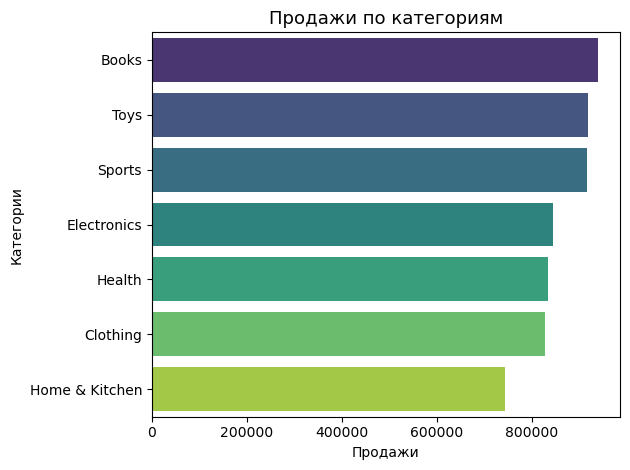

In [45]:
sns.barplot(
    data = categories_sum,
    x = 'total_sales',
    y = 'category',
    order=categories_sum.sort_values('total_sales', ascending=False)['category'],
    palette = 'viridis'
)

plt.title('Продажи по категориям', fontsize = 13)
plt.xlabel('Продажи')
plt.ylabel('Категории')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5644\3893578289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


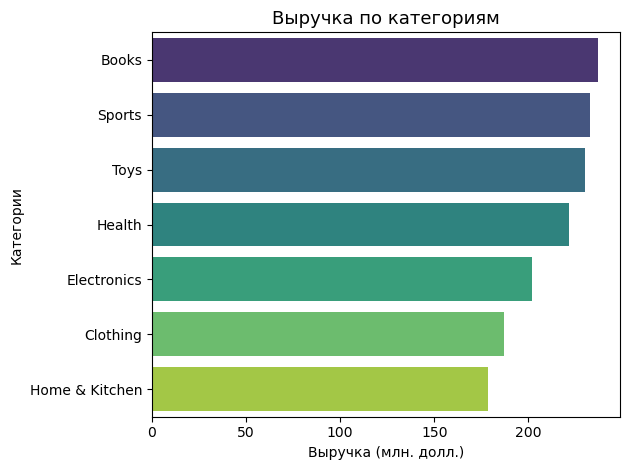

In [47]:
sns.barplot(
    data = categories_sum,
    x = 'revenue',
    y = 'category',
    palette = 'viridis'
)

plt.title('Выручка по категориям', fontsize = 13)
plt.xlabel('Выручка (млн. долл.)')
plt.ylabel('Категории')
plt.tight_layout()
plt.show()

На графиках видно, что порядок категорий по объему продаж и по выручке немного различается.
Например, категории 'Health' и 'Toys' имеют схожие объемы продаж, однако выручка у 'Health' примерно на 10% выше, что указывает на более высокую среднюю цену товаров в этой группе.

Лидерами остаются 'Books', 'Sports' и 'Toys' - именно эти категории формируют основную часть дохода и являются ключевыми для бизнеса.

Таким образом, можно сказать, что структура по категориям выглядит устойчивой, а различия между выручкой и объемом продаж объясняются ценовой политикой внутри категорий.

3. Проанализировать влияние ценообразования на продажи и отзывы клиентов

Построим матрицу корреляций и посмотрим, как связаны между собой цена товара, количество продаж и оценка покупателей.

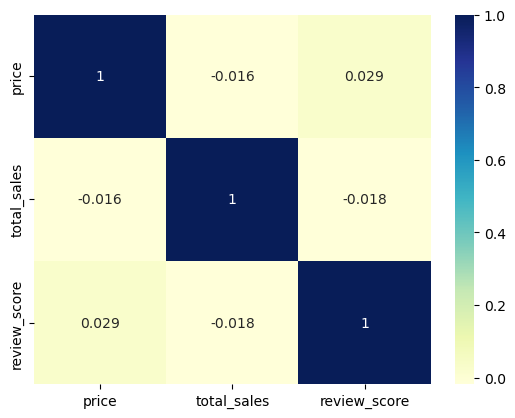

In [52]:
correlation = df[['price', 'total_sales', 'review_score']].corr()

sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')
plt.show()

Сильной зависимости между ценой, продажами и оценками нет. Цена почти не влияет на спрос, а отзывы — на продажи.

Чтобы дополнительно подтвердить результаты корреляционного анализа, построим диаграммы рассеяния между ценой и ключевыми показателями - продажами и оценками.  
Красная линия отражает направление и силу линейной зависимости.

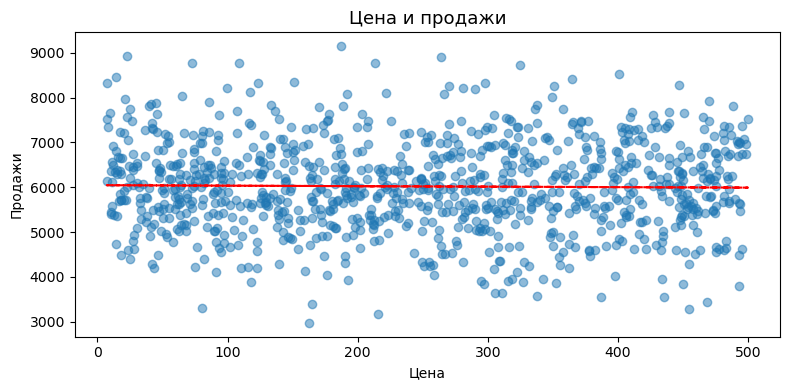

In [57]:
x, y = df['price'], df['total_sales']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize = (8,4))
plt.scatter(x, y, alpha = 0.5)
plt.plot(x, p(x), "r--")
plt.title('Цена и продажи', fontsize = 13)
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.tight_layout()
plt.show()

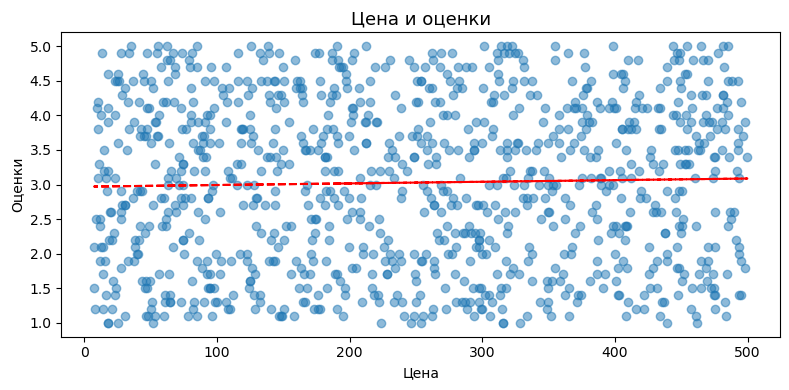

In [59]:
x, y = df['price'], df['review_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize = (8,4))
plt.scatter(x, y, alpha = 0.5)
plt.plot(x, p(x), "r--")
plt.title('Цена и оценки', fontsize = 13)
plt.xlabel('Цена')
plt.ylabel('Оценки')
plt.tight_layout()
plt.show()

На графиках видно, что точки распределены хаотично - это подтверждает отсутствие значимой зависимости между ценой, продажами и оценками.

Далее разделим товары на три группы по цене и посмотрим, как различаются средние продажи и оценки покупателей.

In [63]:
df['price_segment'] = pd.qcut(df['price'], q = 3, labels = ['low', 'mid', 'high'])

In [69]:
segment_analysis = df.groupby('price_segment').agg(
    {'price': 'mean',
    'total_sales': 'mean',
    'review_score': 'mean'}
).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_5644\3438273933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('price_segment').agg(


In [71]:
segment_analysis

,price_segment,price,total_sales,review_score
0,low,81.078378,6061.600601,3.016216
1,mid,246.376527,5966.005988,2.988922
2,high,415.580390,6032.291291,3.077778


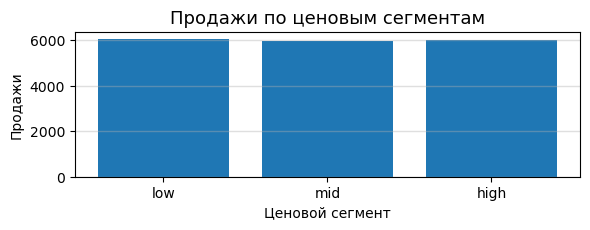

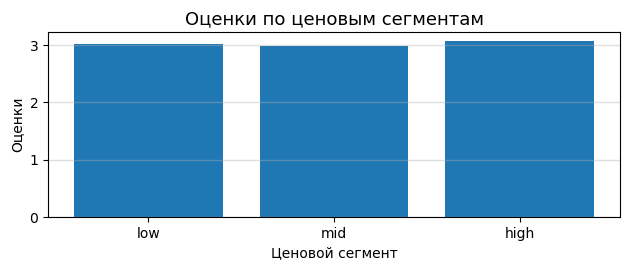

In [187]:
plt.figure(figsize = (6,4))

plt.subplot(2, 1, 1)
plt.bar(segment_analysis['price_segment'], segment_analysis['total_sales'])
plt.title('Продажи по ценовым сегментам', fontsize = 13)
plt.xlabel('Ценовой сегмент')
plt.ylabel('Продажи')
plt.grid(axis = 'y', alpha = 0.4, linewidth = 1)
plt.tight_layout()
plt.show()

plt.subplot(2, 1, 2)
plt.bar(segment_analysis['price_segment'], segment_analysis['review_score'])
plt.title('Оценки по ценовым сегментам', fontsize = 13)
plt.xlabel('Ценовой сегмент')
plt.ylabel('Оценки')
plt.grid(axis = 'y', alpha = 0.4, linewidth = 1)
plt.tight_layout()
plt.show()

Продажи и оценки почти не зависят от уровня цены - спрос и удовлетворенность покупателей остаются стабильными во всех сегментах.

Анализ взаимосвязей показал, что уровень цены практически не влияет ни на продажи, ни на оценки покупателей.
Корреляции близки к нулю, что подтверждается и scatter-графиками - точки распределены без явной зависимости.
Даже при разделении на ценовые сегменты продажи и оценки остаются примерно на одном уровне.
Это говорит о том, что цена не является основным фактором спроса, а ключевую роль, вероятно, играют категория товара и маркетинговые активности.

4. Изучить тенденции и закономерности сезонных распродаж

Определим динамику продаж по месяцам и рассчитаем индекс сезонности, чтобы выявить возможные пики и спады спроса в течение года.

In [80]:
month_cols = ['sales_jan', 'sales_feb', 'sales_mar', 'sales_apr', 'sales_may', 'sales_jun',
              'sales_jul', 'sales_aug', 'sales_sep', 'sales_oct', 'sales_nov', 'sales_dec']

In [82]:
monthly_sales = df[month_cols].sum().reset_index()
monthly_sales.columns = ['month', 'sum_sales']

In [88]:
monthly_sales

,month,sum_sales
0,Jan,498306
1,Feb,507661
2,Mar,506739
3,Apr,503823
4,May,487194
5,Jun,491653
6,Jul,507011
7,Aug,504569
8,Sep,491934
9,Oct,514798


In [86]:
monthly_sales['month'] = monthly_sales['month'].str.replace('sales_', '').str.capitalize()

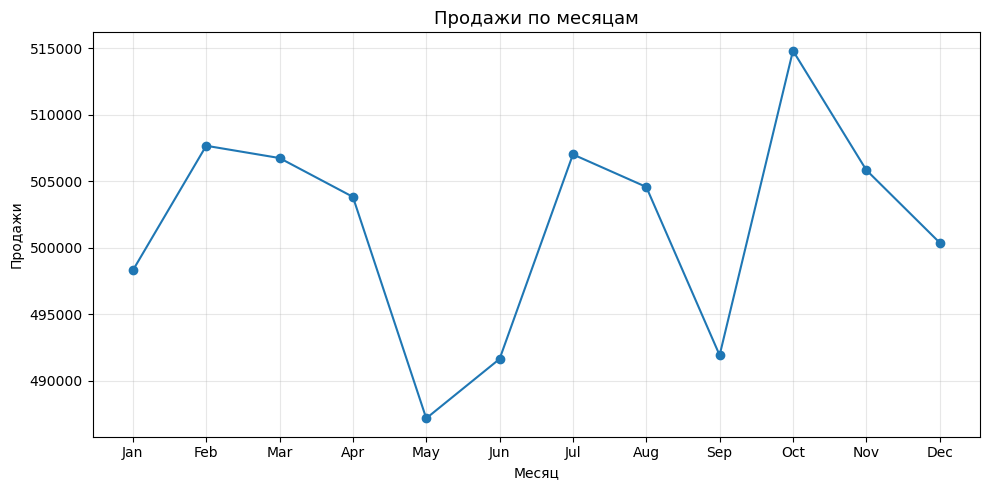

In [90]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'], monthly_sales['sum_sales'], marker = 'o')
plt.title('Продажи по месяцам', fontsize = 13)
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.grid( alpha = 0.3)
plt.tight_layout()
plt.show()

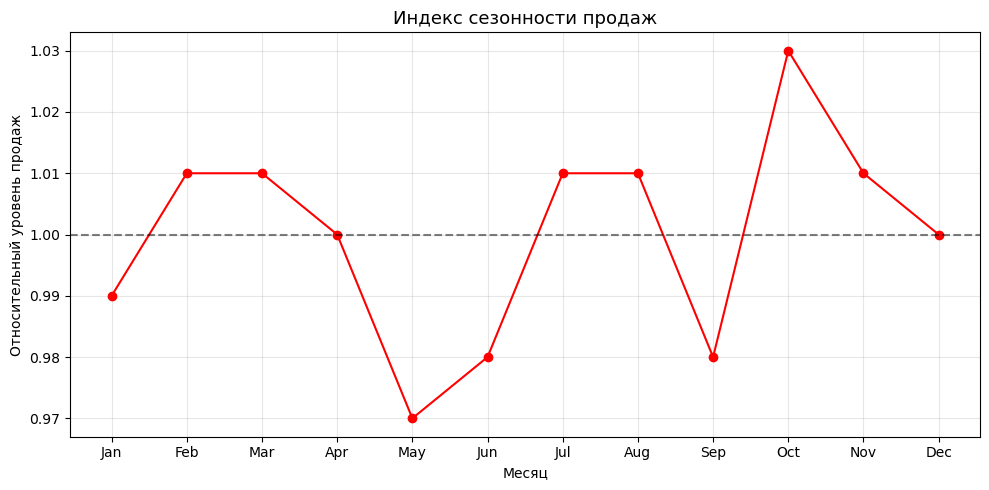

In [92]:
monthly_sales['seasonality_index'] = (monthly_sales['sum_sales'] / monthly_sales['sum_sales'].mean()).round(2)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'], monthly_sales['seasonality_index'], marker='o', color='red')
plt.axhline(1, color='black', linestyle='--', alpha = 0.5)
plt.title('Индекс сезонности продаж', fontsize = 13)
plt.xlabel('Месяц')
plt.ylabel('Относительный уровень продаж')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Продажи в целом распределены равномерно в течение года, однако можно выделить умеренные сезонные колебания.
Снижения в мае и сентябре могут быть связаны с завершением весенних и летних сезонов, когда снижается активность покупателей после праздничных и отпускных периодов.
Пик в октябре вероятно обусловлен началом активного осеннего спроса и подготовкой к крупным распродажам и праздникам (например, Halloween, Black Friday, ранние новогодние покупки).
При этом амплитуда колебаний невелика (около 3%), что говорит о стабильном спросе.

Далее, для каждой категории расчитаем помесячные продажи и построим тепловую карта, отражающую сезонные колебания спроса.

In [95]:
categories_months = df.groupby('category')[month_cols].sum()

In [101]:
categories_months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [99]:
categories_months.columns = [c.replace('sales_', '').capitalize() for c in categories_months.columns]

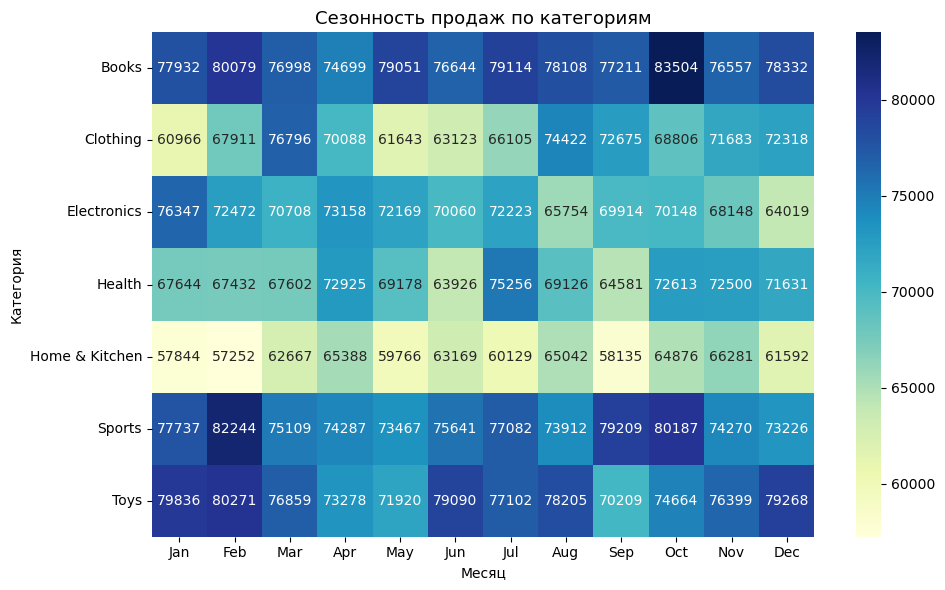

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(categories_months, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Сезонность продаж по категориям', fontsize = 13)
plt.xlabel('Месяц')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

На тепловой карте видно, что 'Books', 'Toys' и 'Sports' сохраняют лидерство в течение всего года, демонстрируя устойчивый спрос.
При этом основной пик продаж в октябре формируют именно 'Books' и 'Sports' - эти категории показывают наиболее заметный рост и вносят основной вклад в общий сезонный всплеск.
Самая отстающая категория - 'Home & Kitchen', где продажи остаются ниже средних и практически не реагируют на сезонные колебания.
Таким образом, сезонные колебания влияют на все категории схожим образом, но уровень спроса у лидеров заметно выше, что подтверждает общие закономерности, выявленные ранее.

Анализ сезонных тенденций показал, что продажи в целом остаются стабильными в течение года, однако наблюдается выраженный пик в октябре.
Этот всплеск хорошо виден на графике индекса сезонности, где октябрь демонстрирует наибольшее отклонение выше среднего уровня.
Сезонный рост в основном обеспечивают категории 'Books' и 'Sports', тогда как 'Home & Kitchen' остается наименее активной.
Таким образом, можно сделать вывод, что осенний период является ключевым для бизнеса, а основной вклад в повышение продаж дают товары, связанные с досугом и активным образом жизни.

5. Оценить удовлетворенность клиентов на основе количества и количества отзывов

Разобьем оценки покупателей на интервалы и визуализируем их распределение, чтобы оценить общую тенденцию удовлетворенности клиентов.

In [112]:
df[['review_score', 'review_count']].describe()

,review_score,review_count
count,1000.000000,1000.000000
mean,3.027600,526.506000
std,1.171243,282.269932
min,1.000000,1.000000
25%,2.000000,283.750000
50%,3.100000,543.000000
75%,4.000000,772.000000
max,5.000000,999.000000


In [114]:
reviews = df[['review_score', 'review_count']]
reviews = reviews.copy()

In [116]:
bins = np.arange(1, 5.5, 0.5)
labels = ['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
reviews['review_bins'] = pd.cut(reviews['review_score'], bins = bins, labels = labels, include_lowest = True)

In [118]:
reviews

,review_score,review_count,review_bins
0,1.7,220,1.5-2.0
1,3.2,903,3.0-3.5
2,4.5,163,4.0-4.5
3,3.9,951,3.5-4.0
4,4.2,220,4.0-4.5
...,...,...,...
995,3.6,494,3.5-4.0
996,4.8,701,4.5-5.0
997,1.3,287,1.0-1.5
998,1.2,720,1.0-1.5


C:\Users\User\AppData\Local\Temp\ipykernel_5644\943328035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_bins', data=reviews, palette='viridis', zorder= 3)


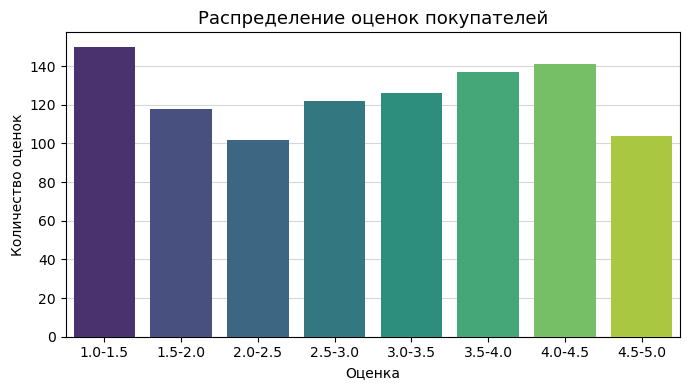

In [130]:
plt.figure(figsize=(7,4))
sns.countplot(x='review_bins', data=reviews, palette='viridis', zorder= 3)
plt.title('Распределение оценок покупателей', fontsize = 13)
plt.xlabel('Оценка')
plt.ylabel('Количество оценок')
plt.grid(axis = 'y', zorder=0, alpha = 0.5)
plt.tight_layout()
plt.show()

Распределение оценок покупателей смещено в сторону низких значений - наибольшее количество отзывов приходится на диапазон 1.0–1.5, тогда как высокие оценки встречаются заметно реже. Это может свидетельствовать о недовольстве части клиентов качеством товаров или обслуживания.
Тем не менее, виден небольшой рост числа положительных оценок (в диапазонах 3.5–4.5), что может говорить о наличии отдельных успешных позиций в ассортименте.

Далее посмотрим, существует ли зависимость между количеством продаж и пользовательскими отзывами - как по оценкам, так и по количеству отзывов.

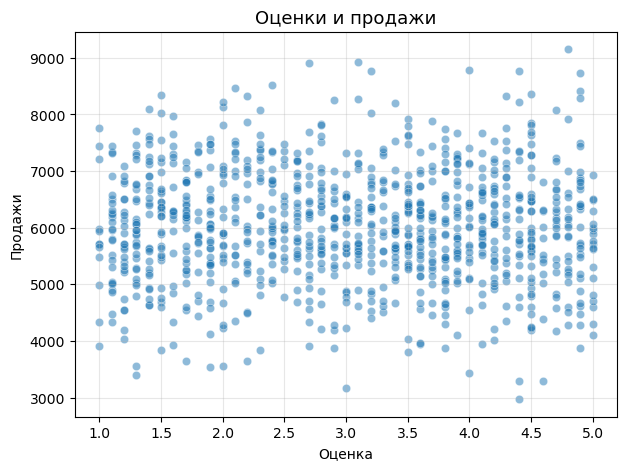

In [140]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x = 'review_score', y = 'total_sales', alpha = 0.5)
plt.title('Оценки и продажи', fontsize = 13)
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.grid(alpha=0.3)
plt.show()

In [149]:
corr_score_sales = df[['review_score', 'total_sales']].corr().iloc[0,1]
print(f'Коэффициент корреляции оценок и продаж:{corr_score_sales:.2f}')

Коэффициент корреляции оценок и продаж:-0.02


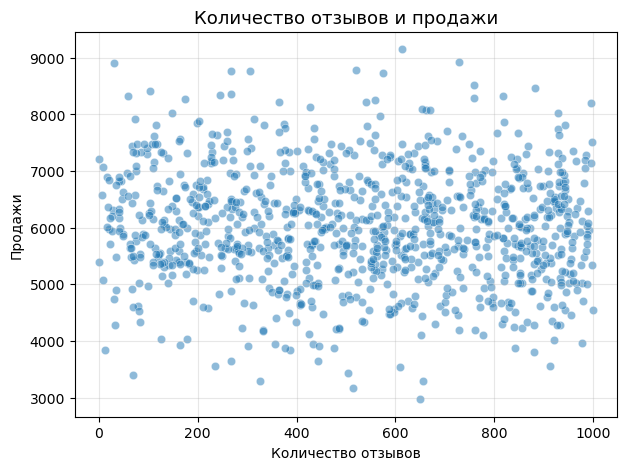

In [144]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='review_count', y='total_sales', alpha=0.5)
plt.title('Количество отзывов и продажи', fontsize = 13)
plt.xlabel('Количество отзывов')
plt.ylabel('Продажи')
plt.grid(alpha=0.3)
plt.show()

In [153]:
corr_count_sales = df[['review_count', 'total_sales']].corr().iloc[0,1]
print(f'Коэффициент корреляции количествов отзывов и продаж: {corr_count_sales:.2f}')

Коэффициент корреляции количествов отзывов и продаж: -0.07


На обоих графиках точки распределены хаотично, без выраженной тенденции, а коэффициенты корреляции также близки к нулю, что указывает на отсутствие значимой зависимости между продажами и отзывами.
Это говорит о том, что ни высокая оценка, ни большое количество отзывов не гарантируют роста продаж.

Также сравним средний рейтинг и среднее количество отзывов по категориям, чтобы понять, какие товары вызывают наибольший отклик и удовлетворенность покупателей.

In [157]:
categories_reviews = df.groupby('category', as_index=False).agg(
    {'review_score': 'mean',
    'review_count': 'mean'}
).sort_values('review_score', ascending = False)

categories_reviews

,category,review_score,review_count
2,Electronics,3.143478,535.231884
0,Books,3.096753,514.694805
5,Sports,3.091503,547.228758
4,Home & Kitchen,3.035200,541.880000
3,Health,3.005036,520.848921
1,Clothing,2.952143,502.478571
6,Toys,2.870861,524.337748


C:\Users\User\AppData\Local\Temp\ipykernel_5644\2698693268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categories_reviews, x='review_score', y='category', palette='viridis')


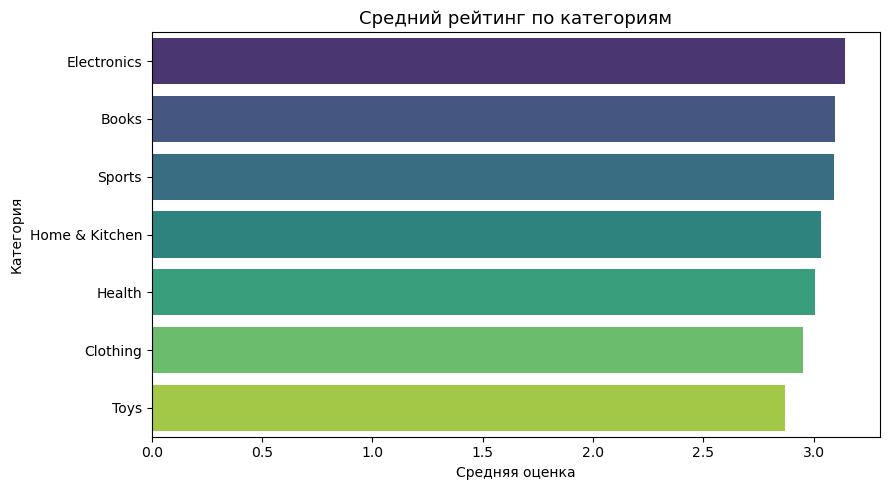

In [159]:
plt.figure(figsize=(9,5))
sns.barplot(data=categories_reviews, x='review_score', y='category', palette='viridis')
plt.title('Средний рейтинг по категориям', fontsize = 13)
plt.xlabel('Средняя оценка')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5644\1389744094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categories_reviews, x='review_count', y='category', palette='viridis',


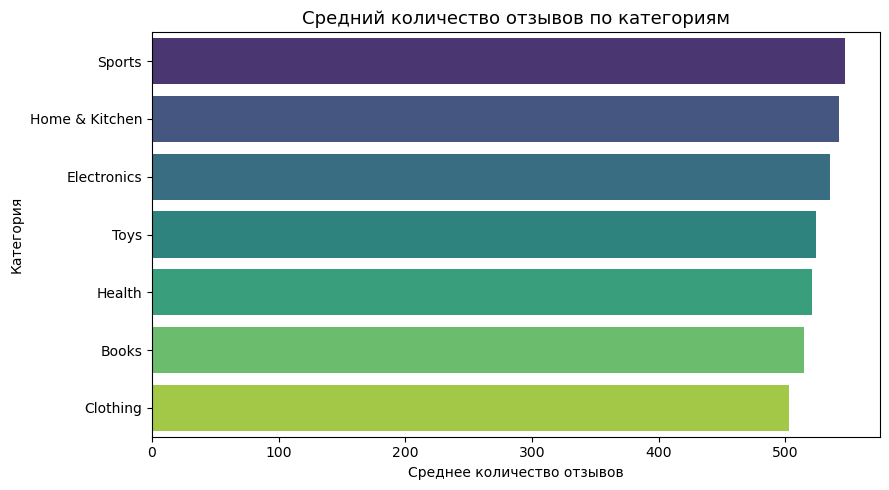

In [165]:
plt.figure(figsize=(9,5))
sns.barplot(data=categories_reviews, x='review_count', y='category', palette='viridis', 
            order=categories_reviews.sort_values('review_count', ascending=False)['category'])
plt.title('Средний количество отзывов по категориям', fontsize = 13)
plt.xlabel('Среднее количество отзывов')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

Категории 'Electronics', 'Books' и 'Sports' получают наиболее высокие средние оценки, что говорит о хорошем восприятии этих товаров пользователями.
Однако при этом наибольшее количество отзывов фиксируется также у 'Sports' и 'Home & Kitchen', что указывает на их высокую вовлеченность аудитории.
Совокупно это подтверждает, что активность отзывов не всегда совпадает с уровнем удовлетворенности.

Анализ показал, что оценки покупателей распределены довольно равномерно, но заметна значительная доля низких отзывов, что может указывать на проблемы с качеством или ожиданиями клиентов.
При этом ни высокий рейтинг, ни большое количество отзывов не оказывают заметного влияния на уровень продаж - корреляция между ними практически отсутствует.

Таким образом, для улучшения клиентского опыта стоит уделить внимание качеству и позиционированию товаров в слабых категориях, а не просто увеличению числа отзывов.